**验证、说明rpart算法倾向于选择类别取值多的特征**

In [1]:
options(warn=-1)    #忽略一切警告
options('width'=140)  #充分利用打印宽度
options(repr.plot.width=15, repr.plot.height=10)  #满幅

library(pacman)
p_load(randomForest)
p_load(skimr)
s <- skim_tee

In [4]:
# 生成数据--x1~x4与y独立
set.seed(100)
x1 <- factor((sample(500) %% 2)) # 2种取值
set.seed(101)
x2 <- factor((sample(500) %% 10)) # 10种取值
set.seed(102)
x3 <- factor((sample(500) %% 20)) # 20种取值
set.seed(103)
x4 <- factor((sample(500) %% 25)) # 25种取值
set.seed(104)
x5 <- factor((sample(500) %% 50)) # 50种取值
set.seed(105)
y <- factor((sample(500) %% 2))

dt <- data.frame(x1, x2, x3, x4, x5,y)

# 独立性假设检验
(chisq.test(table(x1, y), simulate.p.value = TRUE)$p.value)
(chisq.test(table(x2, y), simulate.p.value = TRUE)$p.value)
(chisq.test(table(x3, y), simulate.p.value = TRUE)$p.value)
(chisq.test(table(x4, y), simulate.p.value = TRUE)$p.value)
(chisq.test(table(x5, y), simulate.p.value = TRUE)$p.value)
#p值均>>0.05，不能拒绝x1~x4与y独立

[1] 1

[1] 0.8875562

[1] 0.5767116

[1] 0.4682659

[1] 0.7011494

  |==================================================================================================================================| 100%

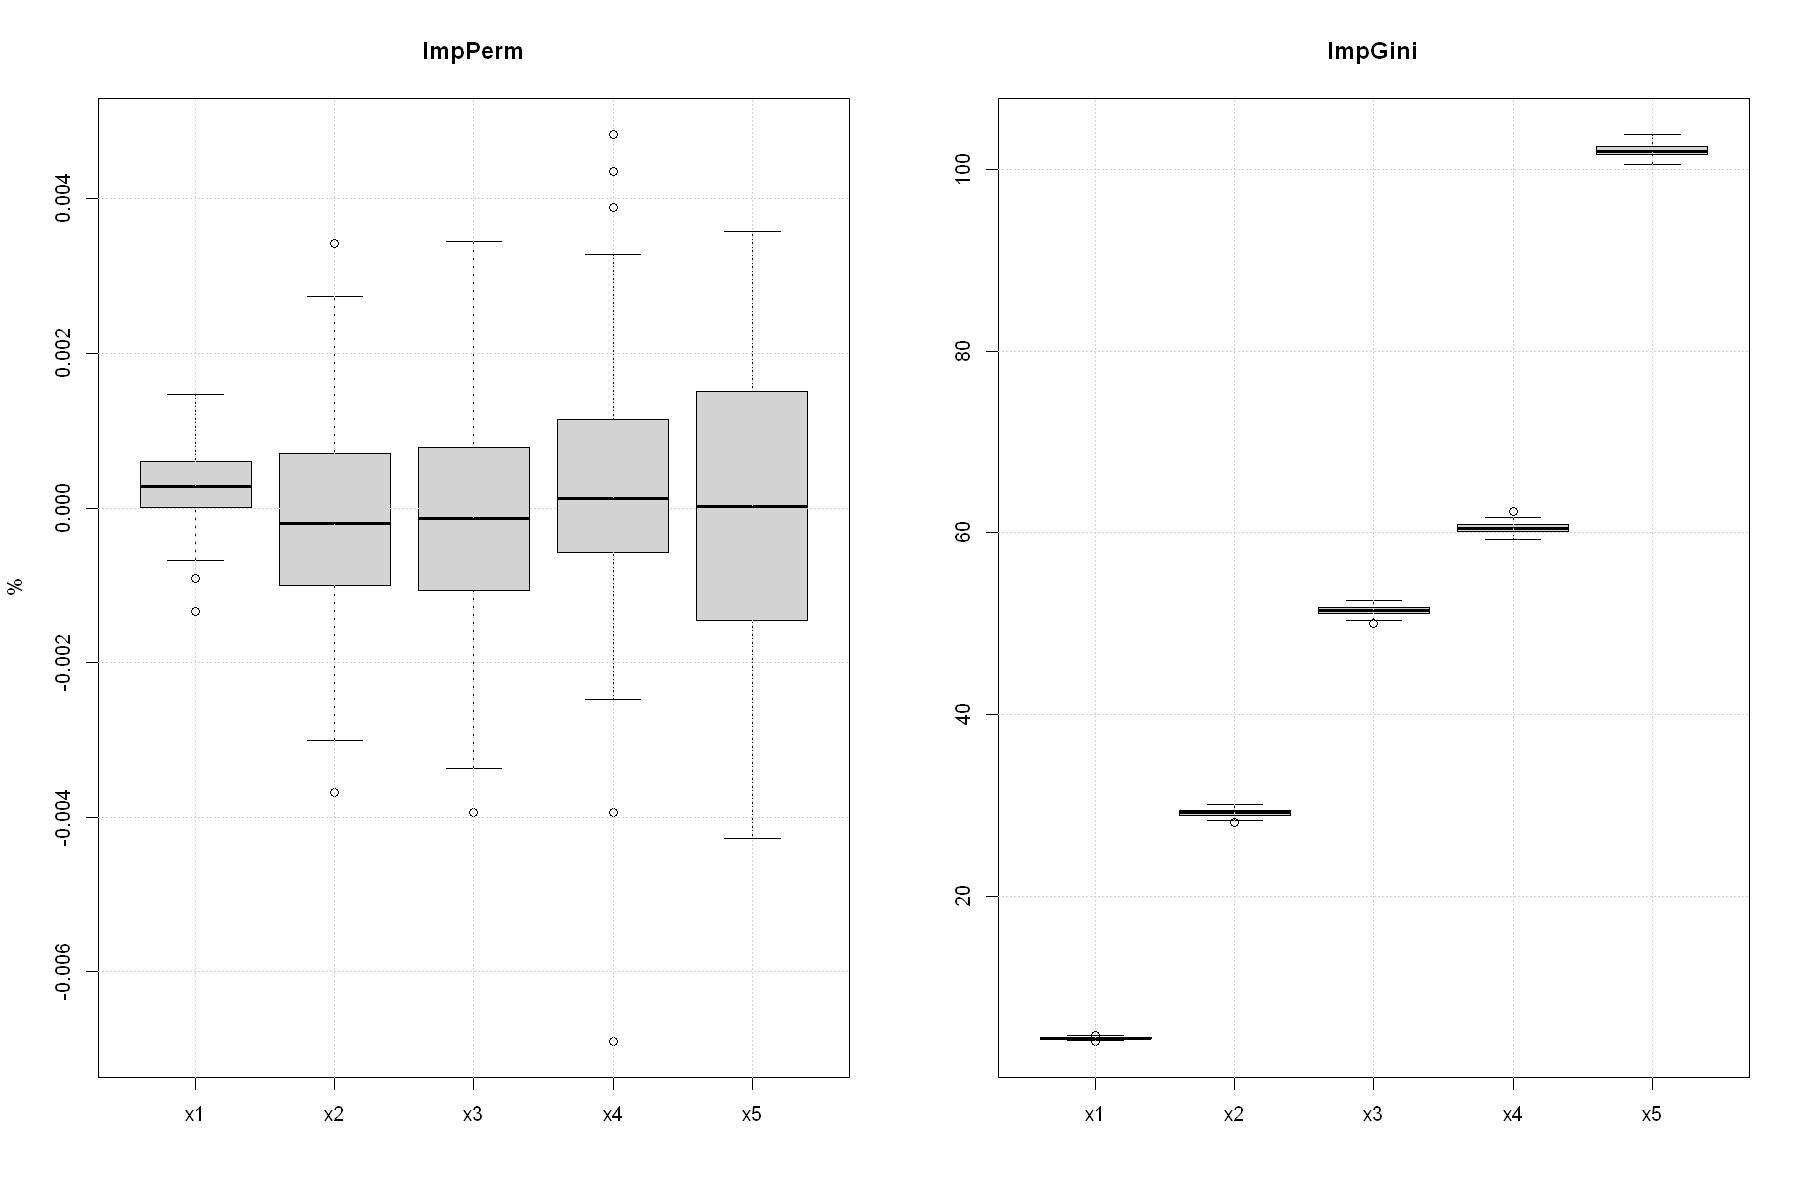

In [5]:
nr <- 100     # number of experiment

ImpPerm <- matrix(ncol = 5, nrow = nr) # 用于存储多次实验得到Permutation Importance的数据
colnames(ImpPerm) <- paste("x", (1:5), sep = "") # 以变量名命名列
ImpGini <- matrix(ncol = 5, nrow = nr) # 用于存储多次实验得到Permutation Importance的数据
colnames(ImpGini) <- paste("x", (1:5), sep = "") # 以变量名命名列

library(pacman)
p_load(randomForest)
pb <- txtProgressBar(style = 3)
for (i in 1:nr) {
  set.seed(i)
  rf_randomForest <- randomForest(y ~ ., data = dt, importance = TRUE)
  imp <- importance(rf_randomForest, scale = FALSE)
  
  ImpPerm[i, ] <- imp[, 3]
  ImpGini[i, ] <- imp[, 4]
  
  setTxtProgressBar(pb, i / nr)
}

par(mfrow = c(1, 2))
boxplot(ImpPerm, main = "ImpPerm", ylab = "%")
grid()
boxplot(ImpGini, main = "ImpGini")
grid()

由上图可见：
- ImpPerm均值及分布均在0值附近，不随着类别数增大而规律性变化。
- ImpGini值随着类别数增大而提升

**结论**
- ImpPerm并不倾向于类别数多的特征
- ImpGini值倾向于类别数多的特征